#### 4.3 수치 미분 ####

##### 4.3.1 미분 #####


In [6]:
def numerical_diff(f, x):    # 미분 함수, 미분 수식
    h = 1e-4    # 0.0001 - : 연산 아님 띄어쓰기 하면 안됨
    return (f(x+h) - f(x-h)) / (2*h)

##### 4.3.2 수치 미분


In [2]:
def function_1(x):    # 미분할 함수
    return 0.01 * x ** 2 + 0.1 * x

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d * x
    
    return lambda t: d * t + y

0.2999999999986347


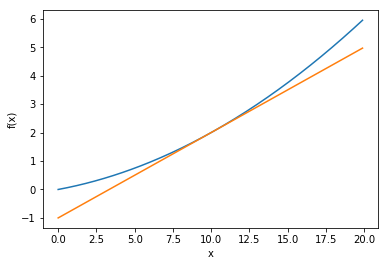

In [7]:
%matplotlib inline
# 워였더라 이거
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)    #0.0부터 20.0까지 0.1 간격으로 배열을 반환
y = function_1(x)    # f(x)

tf = tangent_line(function_1, 10)    #x=10 왜???
y2 = tf(x)    # 위 결과tf가 함수?

plt.xlabel('x'); plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.show()
# feth 하지 못함

##### 4.3.3 편미분

#### 4.4 기울기
x0, x1 양쪽의 편비문을 묶어서 계산. 이와 같이 모든 변수의 편미분을 벡터로 나타낸 것을 기울기라고 한다.


In [16]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)    # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]    # 인자의 배열에 각 데이터
        
        #f(x+h) 
        x[idx] = float(tmp_val) + h   # 배열에 x + h 값을 삽입?
        fxh1 = f(x)    # 여기서 x는 위 값인가?
        
        #f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)    # x와 형상이 같은 새로 생성한 배열에 넣음
        x[idx] = tmp_val    # 값 복원
        
        return grad
    

def numerical_gradient(f, X):
    if X.ndim == 1:    #  ndim -> 배열이 몇 차원 배열인지
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

In [14]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)     #axis???
    

def tangent_line(f,x):
    d = numerical_gradient(f, x)
    prinf(d)
    y = f(x) - d*x
    
    return lambda t: d*t + y
    

No handles with labels found to put in legend.


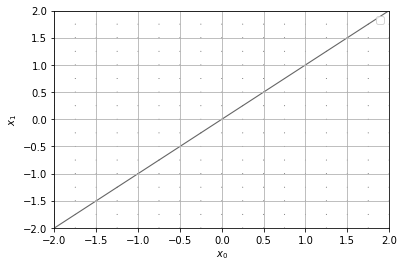

In [17]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)     # meshgrid??

X = X.flatten()      # flatten??
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.grid()
plt.legend()
plt.draw()
plt.show()

 왜 달라..? 어디 오타야~!~